# **Puddle World**
\\
Puddle World is an environment that got traction in the 1990s which was studied by Bryan and Moore (1995) and then later picked up by Rich Sutton in the same year. You can find more information about the environment in the paper "[Generalization in Reinforcement Learning: Successful Examples Using Sparse Coarse Coding"](https://proceedings.neurips.cc/paper_files/paper/1995/hash/8f1d43620bc6bb580df6e80b0dc05c48-Abstract.html)

The agent starts at an initial location or state in the Puddle World and the task for the agent is to navigate around the puddles (avoiding them) to reach the final destination or goal state.

You can find the open-source implementation of this environment in the [gym-puddle github repository](https://github.com/Amii-Open-Source/gym-puddle). This implementation is compatible with the gymnasium library, which makes it easy for you to interact with the environment.

\\

In this Getting Started guide, we will walk you through the environment and how to use it for the competition!

# Installing the Requirements

## For Google Colab

You can access the gym-puddle library by installing the repository by the following command.
You can also include other necessary installations of your own here.

In [1]:
!pip install git+https://github.com/Amii-Open-Source/gym-puddle
!pip install git+https://github.com/DLR-RM/stable-baselines3@f375cc393938a6b4e4dc0fb1de82b4afca37c1bd
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay

  Cloning https://github.com/golnazmes/gym-puddle.git to /tmp/pip-req-build-0zryhsiw
  Running command git clone --filter=blob:none --quiet https://github.com/golnazmes/gym-puddle.git /tmp/pip-req-build-0zryhsiw
  Resolved https://github.com/golnazmes/gym-puddle.git to commit 4d3d6f57b655de866a0d330a1fc07094edcc58d5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.5 MB/s eta 0:00:00
  Created wheel for gym-puddle: filename=gym_puddle-0.0.2-py3-none-any.whl size=5008 sha256=6afea257613bdbc5e9c7c392470481c3f0d8a2051e31b87477c3e64fd096e720
  Stored in directory: /tmp/pip-ephem-wheel-cache-k07or_ld/wheels/1b/df/53/8535ea738561bc2065316bf9cb3f311ff83bfb9eba980151e0
Successfully built gym-puddle
  Cloning https://github.com/DLR-RM/stable-baselines3 (to revision f375cc393938a6b4e4dc0fb1de82b4afca37c1bd) to /tmp/pip-req-build-ws9q7__7
  Running command git clone --filter=blob:none --quiet https://github.com/DLR-RM/stable-baselines3 /tmp/pi

## Local

You can install the library locally by making a virtual environment, and installing the library by pip. The following commands show the details
You can also find the exact versions of other libraries in the `setup.py` file in the repository. The current code is compatible with `python 3.11.6`.
```
python -m venv venv
source venv/bin/activate
pip install -e .
```



# Introduction to the Environment

The "PuddleWorld" environment provides an interface for reinforcement learning experiments. It features puddles and challenges agents to navigate to specified goal positions while avoiding the puddles with larger negative rewards.
You can access key details like starting position, goal location, and action noise levels. By printing these attributes, you can gain insights into the environment's layout and develop strategies for training reinforcement learning algorithms effectively within the PuddleWorld domain.
Here is the default puddle-world configuration inspired by the original paper: \\
In the puddle world, there are four actions, up, down, right, and left, which moves approximately 0.05 in these directions unless the movement would cause the agent to leave the limits of the space. A random gaussian noise with standard deviation 0.01 is also added to the motion along both dimensions. The costs (negative rewards) on this task are −1 for each time step plus additional penalties if either or both of the two oval “puddles” were entered. These penalties are -400 times the distance into the puddle (distance to the nearest edge). The puddles's top left position is [0.  , 0.85] and [0.35, 0.9] respectively, and the width and height for them is [0.55, 0.2 ] and [0.2, 0.6].


In [2]:
import gymnasium as gym
import gym_puddle

from stable_baselines3 import DQN
from stable_baselines3.dqn import MlpPolicy as DQNPolicy

import time
import json

import matplotlib.pyplot as plt
import numpy as np

from IPython import display
import pyvirtualdisplay
import cv2

Here you can find the printed details about the environment.

In [3]:
  env = gym.make("PuddleWorld-v0")

  print("env", env)
  print("start position:", env.get_wrapper_attr("start"))
  print("goal position:", env.get_wrapper_attr("goal"))
  print("goal threshold:", env.get_wrapper_attr("goal_threshold"))
  print("action noise:", env.get_wrapper_attr("noise"))
  print("agent's thrust:", env.get_wrapper_attr("thrust"))
  print("puddle top left positions:", env.get_wrapper_attr("puddle_top_left"))
  print("puddle widths and heights:", env.get_wrapper_attr("puddle_width"))
  print("action space:", env.get_wrapper_attr("actions"))
  print("observation space:", env.get_wrapper_attr("observation_space"))

env <OrderEnforcing<PassiveEnvChecker<PuddleEnv<PuddleWorld-v0>>>>
start position: [0.2 0.4]
goal position: [1. 1.]
goal threshold: 0.1
action noise: 0.01
agent's thrust: 0.05
puddle top left positions: [array([0.  , 0.85]), array([0.35, 0.9 ])]
puddle widths and heights: [array([0.55, 0.2 ]), array([0.2, 0.6])]
action space: [array([-0.05,  0.  ]), array([0.05, 0.  ]), array([ 0.  , -0.05]), array([0.  , 0.05])]
observation space: Box(0.0, 1.0, (2,), float64)


Here you can take a look at how the environment looks like.

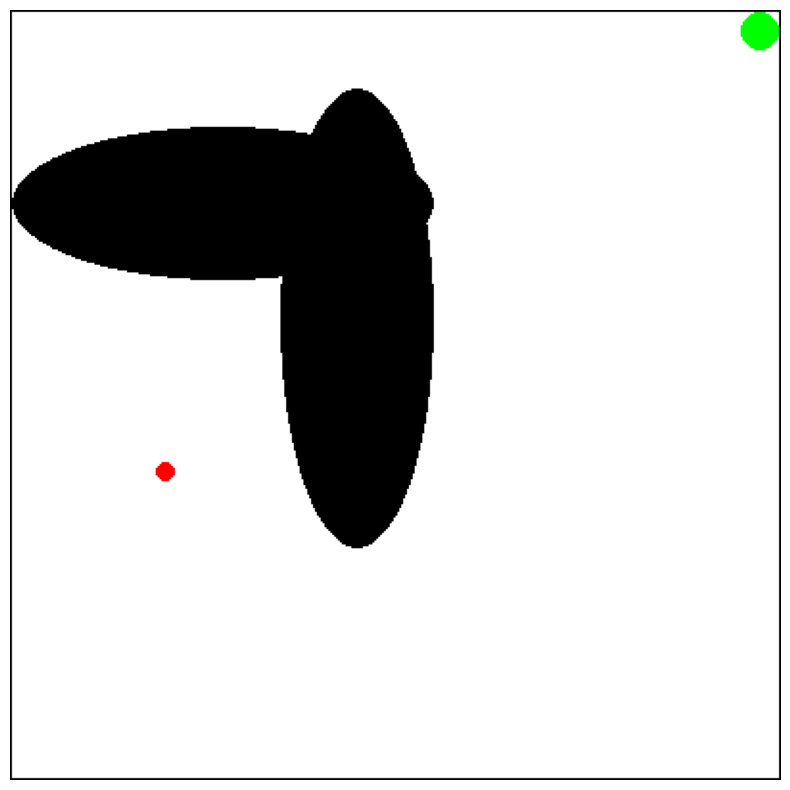

In [ ]:
obs, info = env.reset()
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
img = env.render()
img_with_frame = np.zeros((img.shape[0]+2, img.shape[1]+2, 3), dtype=np.uint8)
img_with_frame[1:-1, 1:-1, :] = img
img = ax.imshow(img_with_frame)
display.display(plt.gcf())
display.clear_output(wait=True)

You can modify the properties of the environment, Like where to start, or where the puddles are.

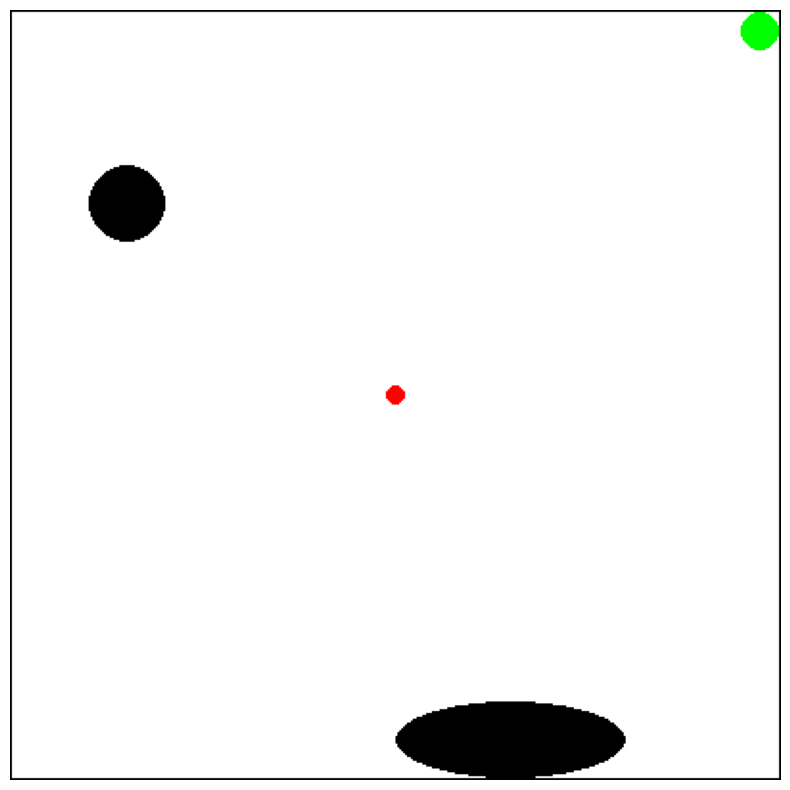

In [4]:
env = gym.make(
        "PuddleWorld-v0",
        start=[0.5,0.5],
        goal=[1.,1.],
        goal_threshold=0.1,
        noise=0.01,
        thrust=0.05,
        puddle_top_left=[[0.1  , 0.8],[0.5, 0.1 ]],
        puddle_width=[[0.1, 0.1 ],[0.3, 0.1]]
    )

obs, info = env.reset()
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
img = env.render()
img_with_frame = np.zeros((img.shape[0]+2, img.shape[1]+2, 3), dtype=np.uint8)
img_with_frame[1:-1, 1:-1, :] = img
img = ax.imshow(img_with_frame)
display.display(plt.gcf())
display.clear_output(wait=True)


In [ ]:
def visualize(frames, video_name = "video.mp4"):
    # Save the frames as an mp4 video using cv2
    video_path = video_name
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video_writer = cv2.VideoWriter(video_path, fourcc, 30, (width, height))
    for frame in frames:
        video_writer.write(frame)
    video_writer.release()

# Access to Different Configurations

Your task is to train an agent that can generalize well across different provided configurations of the environment. Each of these configurations feature different positions for puddles, which makes it challenging for the agent to find the most rewarding path to the goal.

\\

You can find these configurations in the `config` folder of the repository. In order to access each version of the environment, you can provide the `.json` file indicating the environment details, and intitialize the puddle world as follows:
(Note that if you are using colab, you should upload the configs to the files section of the colab)

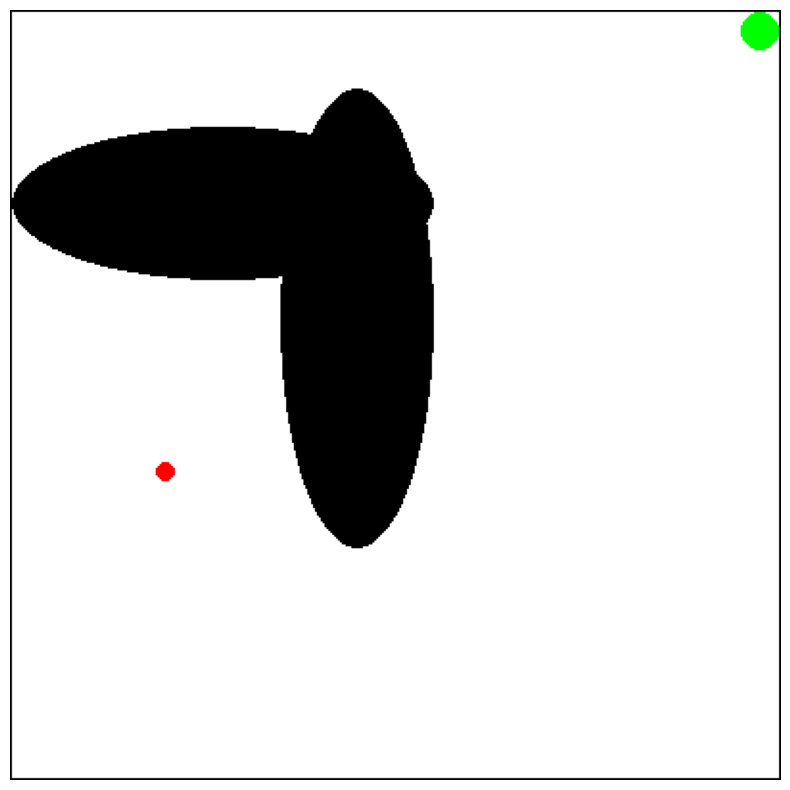

In [10]:
json_file = f"/content/default.json"
with open(json_file) as f:
  env_setup = json.load(f)
env = gym.make(
  "PuddleWorld-v0",
  start=env_setup["start"],
  goal=env_setup["goal"],
  goal_threshold=env_setup["goal_threshold"],
  noise=env_setup["noise"],
  thrust=env_setup["thrust"],
  puddle_top_left=env_setup["puddle_top_left"],
  puddle_width=env_setup["puddle_width"],
)

obs, info = env.reset()
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
img = env.render()
img_with_frame = np.zeros((img.shape[0]+2, img.shape[1]+2, 3), dtype=np.uint8)
img_with_frame[1:-1, 1:-1, :] = img
img = ax.imshow(img_with_frame)
display.display(plt.gcf())
display.clear_output(wait=True)

# Random Agent


In this section, a "random agent" is deployed to interact with the PuddleWorld environment. The environment is initialized and visualized, providing a starting point for the agent to explore teh world. The random agent **selects actions randomly from the action space and applies them to the environment**. This process is repeated for a predetermined number of time steps (in this case, 10 steps). After each step, the agent's reward is accumulated, and the interaction is visualized through rendering the environment. Finally, the total reward earned in the total time steps is displayed, and the sequence of frames captured during the interaction is saved as a video for further analysis. This random agent serves as a baseline for you to see how the envrionemt works and prepare for the performance of more sophisticated reinforcement learning algorithms in the PuddleWorld environment.

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:266: UserWarning: WARN: Human rendering should return `None`, got <class 'numpy.ndarray'>
  logger.warn(


 t: 0, observation: [0.1720269  0.39270824], reward: -1
 t: 1, observation: [0.12326024 0.39699473], reward: -1
 t: 2, observation: [0.13071352 0.43279263], reward: -1
 t: 3, observation: [0.13035702 0.39534421], reward: -1
 t: 4, observation: [0.17331885 0.39637641], reward: -1
 t: 5, observation: [0.10851675 0.40632248], reward: -1
 t: 6, observation: [0.09897263 0.48021354], reward: -1
 t: 7, observation: [0.10585534 0.52158051], reward: -1
 t: 8, observation: [0.0984329  0.57114866], reward: -1
 t: 9, observation: [0.14713094 0.55453145], reward: -1
[]


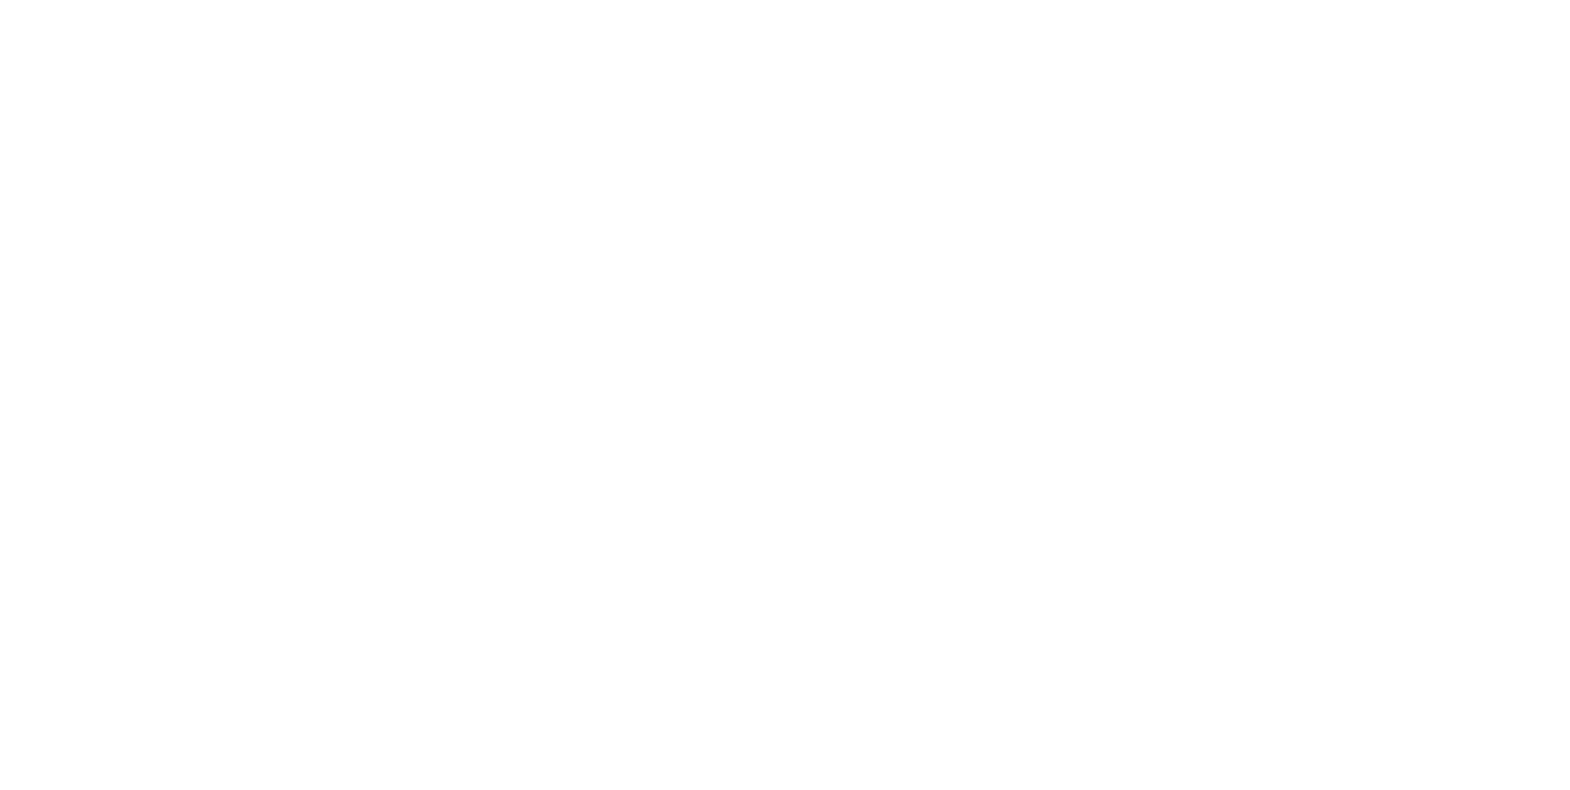

In [ ]:
_display = pyvirtualdisplay.Display(visible=False,size=(1400, 900))  # use False with Xvfb
_ = _display.start()
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')



env = gym.make("PuddleWorld-v0")

obs, info = env.reset()
total_reward = 0
episode_rewards = []
frames = []

for time_step in range(10):
    action = env.action_space.sample()  # take a random action
    observation, reward, done, trunc, info = env.step(action)
    total_reward += reward

    ########## visualize the agent environment interaction##############
    image = env.render()
    # img_with_frame = np.zeros((image.shape[0]+2, image.shape[1]+2, 3), dtype=np.uint8)
    # img_with_frame[1:-1, 1:-1, :] = image
    # ax.imshow(img_with_frame)
    # display.display(plt.gcf())
    # display.clear_output(wait=True)
    #####################################################################
    frames.append(image)
    #####################################################################

    #print(f" t: {time_step}, observation: {observation}, reward: {reward}")

    if done:
      print(f"total reward in this episode: {total_reward}")
      episode_rewards.append(total_reward)
      total_reward = 0
      break

env.close()
print(episode_rewards)
visualize(frames, "random.mp4")


# Human Agent

In this section, a "Human Agent" is introduced to interact with the PuddleWorld environment. The environment is initialized and visualized to provide a starting point for the human agent's interaction. Unlike the random agent, the human agent inputs actions directly from you. You are prompted to enter actions through the command line interface, allowing for real-time interaction. The agent's chosen actions are applied to the environment, and the resulting observations and rewards are displayed. This process is repeated for a predetermined number of time steps (in this case, 10 steps). After each step, the interaction is visualized through rendering the environment. The total reward earned in the total time steps is displayed, and the sequence of frames captured during the interaction is saved as a video for more analysis. This human agent setup enables you to actively engage with the environment and assess its dynamics and challenges from a human perspective.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


enter the action:
1


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:266: UserWarning: WARN: Human rendering should return `None`, got <class 'numpy.ndarray'>
  logger.warn(


 t: 0, observation: [0.25131488 0.41337216], reward: -1
enter the action:
1
 t: 1, observation: [0.29168162 0.42395465], reward: -1
enter the action:
1
 t: 2, observation: [0.33314252 0.42929135], reward: -1
enter the action:
1
 t: 3, observation: [0.38778211 0.4168034 ], reward: -193.27863843733726
enter the action:
1
 t: 4, observation: [0.42933732 0.4136812 ], reward: -194.5275193493068
enter the action:
1
 t: 5, observation: [0.47010715 0.42969266], reward: -188.1229353806471
enter the action:
1
 t: 6, observation: [0.52364033 0.42128673], reward: -191.48530611074875
enter the action:
1
 t: 7, observation: [0.5776572  0.42324687], reward: -1
enter the action:
1
 t: 8, observation: [0.62886933 0.4276806 ], reward: -1
enter the action:
1
 t: 9, observation: [0.67386442 0.43738152], reward: -1
[]


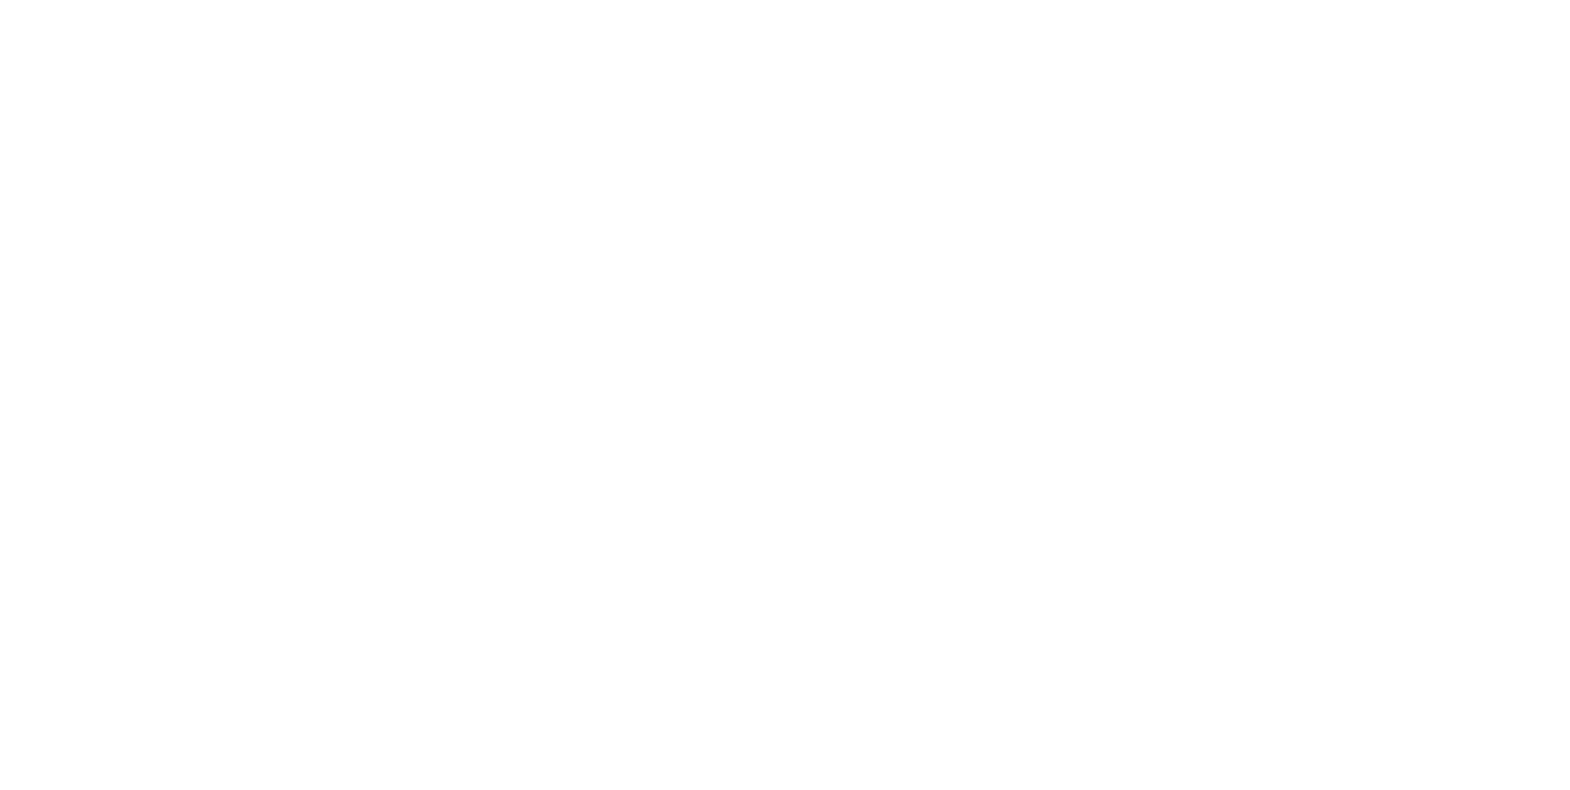

In [ ]:
_display = pyvirtualdisplay.Display(visible=False,size=(1400, 900))  # use False with Xvfb
_ = _display.start()
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')



env = gym.make("PuddleWorld-v0")

obs, info = env.reset()
total_reward = 0
episode_rewards = []
frames = []

for time_step in range(10):
    action = int(input("enter the action:\n"))  # take a random action
    observation, reward, done, trunc, info = env.step(action)
    total_reward += reward

    ########## visualize the agent environment interaction##############
    image = env.render()
    # img_with_frame = np.zeros((image.shape[0]+2, image.shape[1]+2, 3), dtype=np.uint8)
    # img_with_frame[1:-1, 1:-1, :] = image
    # ax.imshow(img_with_frame)
    # display.display(plt.gcf())
    # display.clear_output(wait=True)
    #####################################################################
    frames.append(image)
    #####################################################################

    print(f" t: {time_step}, observation: {observation}, reward: {reward}")

    if done:
      print(f"total reward in this episode: {total_reward}")
      episode_rewards.append(total_reward)
      total_reward = 0
      break

env.close()
print(episode_rewards)
visualize(frames, "human.mp4")


# DQN Agent

In this section, a  [ Deep Q-Network (DQN) agent](https://https://arxiv.org/abs/1312.5602) is utilized to interact with the PuddleWorld environment. The code demonstrates how to set up training with Stable Baselines, a popular library for reinforcement learning. The DQN model is initialized and trained using default hyperparameters, but you can explore and adjust these hyperparameters for optimal performance. After training, the trained model is loaded for evaluation. The environment is initialized, and the DQN agent's interaction with the environment is visualized. The agent selects actions based on the learned policy, and the environment responds accordingly. This process continues until the episode terminates. At the end of the episode, the total reward earned by the agent is displayed, and the sequence of frames captured during the interaction is saved as a video for further analysis. While the provided code serves as a starting point for training a DQN agent with stable baselines if you wish to use this library, you are encouraged to experiment with different hyperparameters to improve the agent's performance in navigating the complex dynamics of the PuddleWorld environment.

In [ ]:
#train the model, and save the trained model
env = gym.make("PuddleWorld-v0")
dqn_model = DQN(DQNPolicy, env, verbose=1)
dqn_model.learn(total_timesteps=int(1e6))
dqn_model.save("dqn_model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.6     |
|    n_updates        | 238631   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.6     |
|    ep_rew_mean      | -367     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 18216    |
|    fps              | 829      |
|    time_elapsed     | 1151     |
|    total_timesteps  | 954754   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.105    |
|    n_updates        | 238663   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.6     |
|    ep_rew_mean      | -360     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 18220    |
|   

In [ ]:
dqn_model = DQN.load("dqn_model")
env = gym.make("PuddleWorld-v0")

obs, info = env.reset()

# Create an empty list to store the frames
frames = []
episode_rewards = []
for episode in range(1):
  total_reward = 0
  done = False
  while not done:
      action, _states = dqn_model.predict(obs)
      observation, reward, done, trunc, info = env.step(action)
      total_reward += reward
      if done == True:
        print("here")

      image = env.render()
      frames.append(image)

      if done:
        print(f"total reward in this episode: {total_reward}")
        episode_rewards.append(total_reward)
        total_reward = 0
        break

env.close()
print(episode_rewards)
visualize(frames, "DQN.mp4")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:266: UserWarning: WARN: Human rendering should return `None`, got <class 'numpy.ndarray'>
  logger.warn(


#Now It's Your Turn!

Now, you're invited to dive into the world of reinforcement learning and take control of the PuddleWorld environment. We encourage you to become an active participant by modifying the provided code, tweaking parameters, and experimenting with different strategies. You can come up with your own agent ideas, or use pre-exisiting libraries, and adapt them to the problem.

\\
The goal is to build **one single agent that can generalize well across all the environment configurations.**
Once you have built your agent, test your trained agent for 100 episodes, in the five provided configurations, save the total reward in each episode for each configuration, and submit the results as a `.csv` file as indicated in the kaggle platform.

 Whether you're a beginner eager to explore or an experienced practitioner seeking to refine your skills, this competition offers an opportunity to apply your knowledge and creativity.

